### import labrery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATA

In [38]:
df = pd.read_csv('amazon.csv')
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


## EDA AND DATA PREPROCESSING

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [41]:
# Clean 'discounted_price' and 'actual_price' columns
for col in ['discounted_price', 'actual_price','rating_count','discount_percentage']:
    df[col] = (
        df[col]
        .str.replace('₹', '', regex=False)
        .str.replace(' ', '', regex=False)
        .str.replace(',', '.', regex=False)
        .str.replace('%', '', regex=False)
    )


In [42]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1.099,64,4.2,24.269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [43]:
cols = ['discounted_price', 'actual_price', 'rating', 'rating_count','discount_percentage']

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1460 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1416 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [47]:
df.isnull().sum()

product_id              0
product_name            0
category                0
discounted_price        5
actual_price            2
discount_percentage     0
rating                  1
rating_count           49
about_product           0
user_id                 0
user_name               0
review_id               0
review_title            0
review_content          0
img_link                0
product_link            0
dtype: int64

In [48]:
# Fill missing numerical columns with mean (or you can choose median)
df['discounted_price'].fillna(df['discounted_price'].mean(), inplace=True)
df['actual_price'].fillna(df['actual_price'].mean(), inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['rating_count'].fillna(0, inplace=True)  # 0 if no rating count

C:\Users\hicham\AppData\Local\Temp\ipykernel_7756\3454536375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discounted_price'].fillna(df['discounted_price'].mean(), inplace=True)
C:\Users\hicham\AppData\Local\Temp\ipykernel_7756\3454536375.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [49]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [53]:
df = df.drop_duplicates()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

## ANALYSIS 

In [56]:
# Number of unique products, categories, users
print('Unique Products:', df['product_id'].nunique())
print('Unique Categories:', df['category'].nunique())
print('Unique Users:', df['user_id'].nunique())

Unique Products: 1351
Unique Categories: 211
Unique Users: 1194


In [57]:
# Average prices
print('Average Discounted Price:', df['discounted_price'].mean())
print('Average Actual Price:', df['actual_price'].mean())


Average Discounted Price: 242.70118013698632
Average Actual Price: 237.6464894053315


In [64]:
# Top 10 most reviewed products
top_reviewed = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
top_reviewed


product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Ty

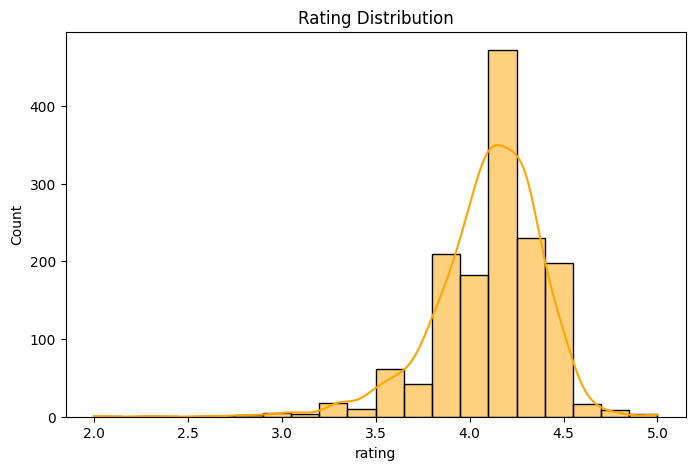

In [82]:
# Rating Distribution - Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True, color='orange')
plt.title('Rating Distribution')
plt.show()



In [63]:
# Top 10 biggest discounts
top_discounts = df.sort_values('discount_percentage', ascending=False).head(10)
print(top_discounts[['product_name', 'discount_percentage']])


                                          product_name  discount_percentage
695  rts [2 Pack] Mini USB C Type C Adapter Plug, T...                   94
372  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                   91
380  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                   91
364  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                   91
368  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                   91
334  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                   91
557  LAPSTER 12pcs Spiral Cable Protectors for Char...                   90
920  Silicone Rubber Earbuds Tips, Eartips, Earpads...                   90
644  Sounce Spiral Charger Cable Protector Data Cab...                   90
407  Sounce Spiral Charger Cable Protector Data Cab...                   90


In [80]:
# Highest rated categories
highest_rated = df.groupby('category')['rating'].mean().sort_values(ascending=False).head()
print(highest_rated)



category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


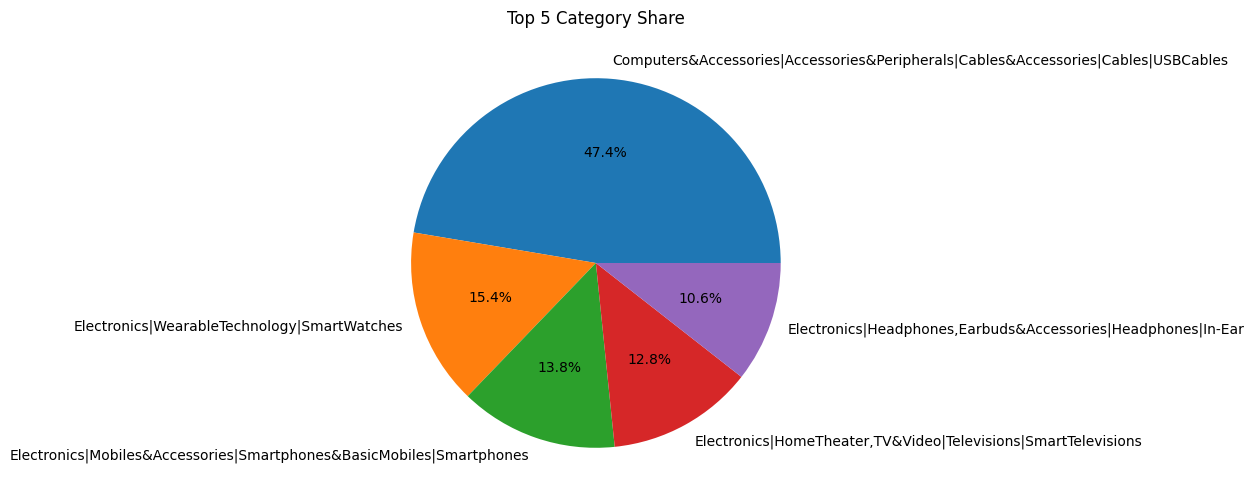

In [83]:
# Category Share - Pie Chart
df['category'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Top 5 Category Share')
plt.ylabel('')
plt.show()


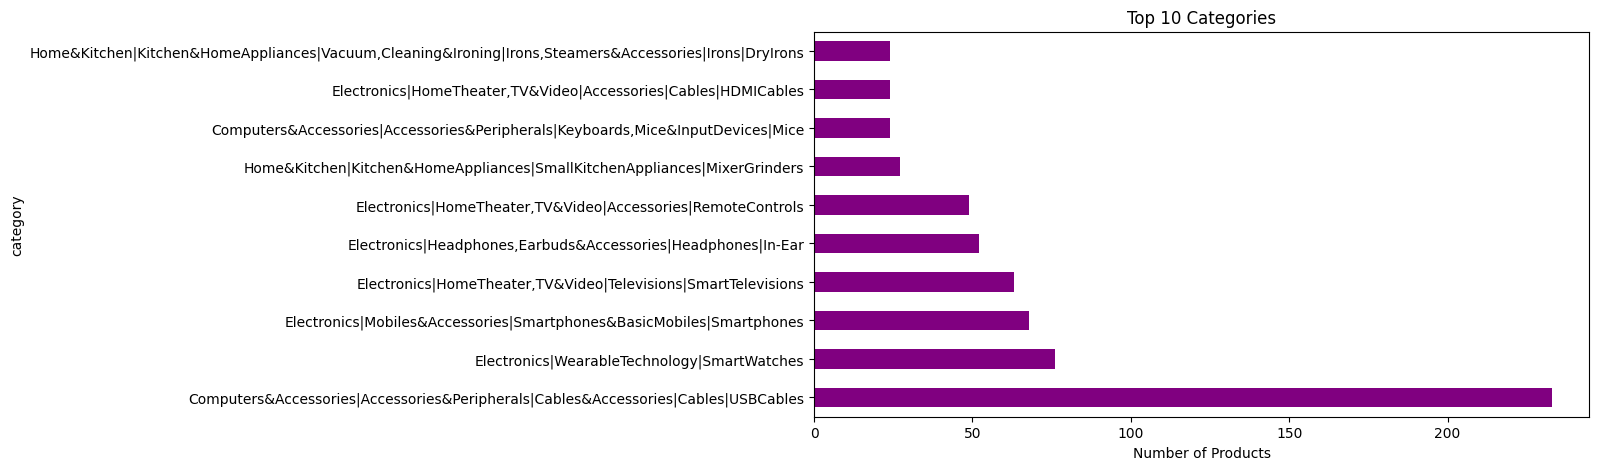

In [81]:
# Top 10 Categories - Bar Plot
top_categories = df['category'].value_counts().head(10)
top_categories.plot(kind='barh', figsize=(10,5), color='purple')
plt.title('Top 10 Categories')
plt.xlabel('Number of Products')
plt.show()



In [73]:
# Top reviewers
top_reviewers = df['user_name'].value_counts().head(5)
top_reviewers

user_name
$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE               10
Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM                                8
Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simranpreet Singh,Saptarshi,Amazon Customer,D.RAGHUL,Dharmendra kumar     8
ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam                                            7
Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ravi Siddan,Himanshu Goel,Udaykumar                           7
Name: count, dtype: int64

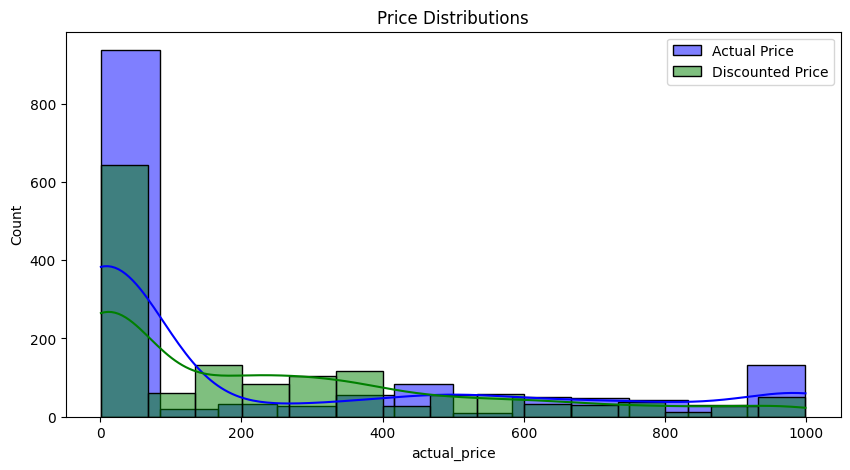

In [65]:
# Price distributions
plt.figure(figsize=(10,5))
sns.histplot(df['actual_price'], kde=True, color='blue', label='Actual Price')
sns.histplot(df['discounted_price'], kde=True, color='green', label='Discounted Price')
plt.legend()
plt.title('Price Distributions')
plt.show()

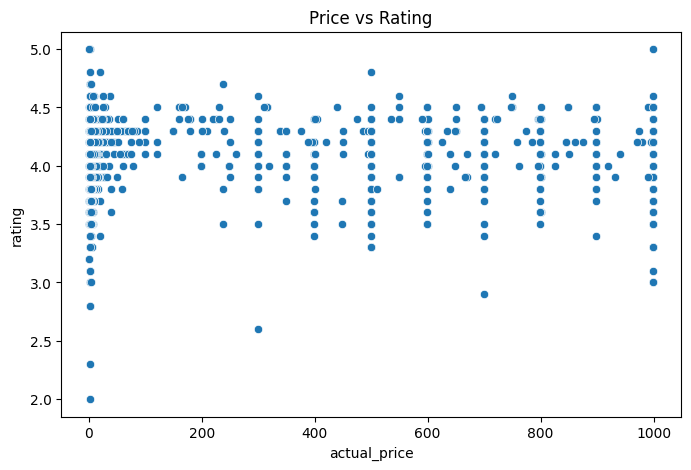

In [66]:
# Price vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='actual_price', y='rating', data=df)
plt.title('Price vs Rating')
plt.show()
